In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
pago=pd.read_csv('pago_colegios.csv')
rendimiento=pd.read_csv('rendimiento.csv')
puntaje=pd.read_csv('Puntaje_2024_filtrado.csv')

C:\Users\benja\AppData\Local\Temp\ipykernel_24036\525708223.py:2: DtypeWarning: Columns (5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  rendimiento=pd.read_csv('rendimiento.csv')


In [8]:
puntaje.columns

Index(['MRUN', 'COD_SEXO', 'RBD', 'NOMBRE_UNIDAD_EDUC', 'DEPENDENCIA',
       'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO', 'PROMEDIO_NOTAS', 'PTJE_NEM',
       'PORC_SUP_NOTAS', 'PTJE_RANKING', 'CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL',
       'MATE2_REG_ACTUAL', 'PROMEDIO_CM_MAX'],
      dtype='object')

In [9]:
rendimiento.columns

Index(['MRUN', 'PROM_GRAL2020', 'ASISTENCIA2020', 'PROM_GRAL2021',
       'ASISTENCIA2021', 'PROM_GRAL2022', 'ASISTENCIA2022', 'GEN_ALU2023',
       'EDAD_ALU', 'COD_COM_ALU2023', 'PROM_GRAL2023', 'ASISTENCIA2023',
       'COD_JOR', 'COD_COM_RBD', 'MismaCom'],
      dtype='object')

In [10]:
pago.columns

Index(['RBD', 'PAGO_MATRICULA2020', 'PAGO_MENSUAL2020', 'PAGO_MATRICULA2021',
       'PAGO_MENSUAL2021', 'PAGO_MATRICULA2022', 'PAGO_MENSUAL2022',
       'PAGO_MATRICULA2023', 'PAGO_MENSUAL2023', 'RURAL'],
      dtype='object')

<Axes: xlabel='PROMEDIO_CM_MAX', ylabel='Count'>

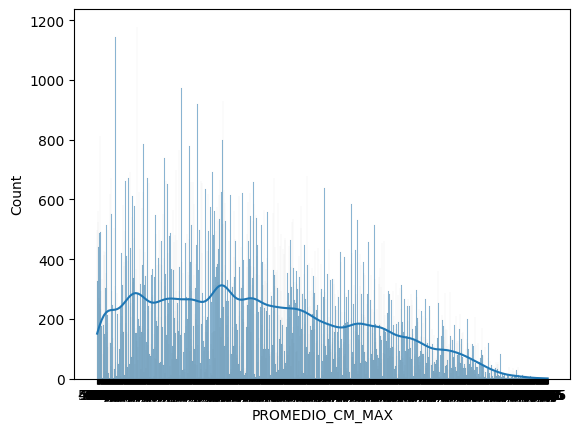

In [17]:
sns.histplot(data=puntaje,x='PROMEDIO_CM_MAX',kde=True)

In [16]:
rend_puntaje = pd.merge(puntaje, rendimiento, on='MRUN')
rend_puntaje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238853 entries, 0 to 238852
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MRUN                  238853 non-null  int64  
 1   COD_SEXO              238853 non-null  int64  
 2   RBD                   238853 non-null  object 
 3   NOMBRE_UNIDAD_EDUC    238853 non-null  object 
 4   DEPENDENCIA           238853 non-null  object 
 5   NOMBRE_COMUNA_EGRESO  238853 non-null  object 
 6   ANYO_DE_EGRESO        238853 non-null  object 
 7   PROMEDIO_NOTAS        238853 non-null  object 
 8   PTJE_NEM              238853 non-null  int64  
 9   PORC_SUP_NOTAS        238853 non-null  int64  
 10  PTJE_RANKING          238853 non-null  int64  
 11  CLEC_REG_ACTUAL       238853 non-null  float64
 12  MATE1_REG_ACTUAL      238853 non-null  float64
 13  MATE2_REG_ACTUAL      238853 non-null  int64  
 14  PROMEDIO_CM_MAX       238853 non-null  object 
 15  

In [19]:
rend_puntaje['RBD'].replace(" ", pd.NA, inplace=True)
rend_puntaje.dropna(subset=['RBD'],inplace=True)
rend_puntaje['RBD'] = rend_puntaje['RBD'].astype(int)

rend_puntaje_pago=pd.merge(rend_puntaje, pago, on='RBD')

In [20]:
rend_puntaje_pago.columns

Index(['MRUN', 'COD_SEXO', 'RBD', 'NOMBRE_UNIDAD_EDUC', 'DEPENDENCIA',
       'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO', 'PROMEDIO_NOTAS', 'PTJE_NEM',
       'PORC_SUP_NOTAS', 'PTJE_RANKING', 'CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL',
       'MATE2_REG_ACTUAL', 'PROMEDIO_CM_MAX', 'PROM_GRAL2020',
       'ASISTENCIA2020', 'PROM_GRAL2021', 'ASISTENCIA2021', 'PROM_GRAL2022',
       'ASISTENCIA2022', 'GEN_ALU2023', 'EDAD_ALU', 'COD_COM_ALU2023',
       'PROM_GRAL2023', 'ASISTENCIA2023', 'COD_JOR', 'COD_COM_RBD', 'MismaCom',
       'PAGO_MATRICULA2020', 'PAGO_MENSUAL2020', 'PAGO_MATRICULA2021',
       'PAGO_MENSUAL2021', 'PAGO_MATRICULA2022', 'PAGO_MENSUAL2022',
       'PAGO_MATRICULA2023', 'PAGO_MENSUAL2023', 'RURAL'],
      dtype='object')

In [21]:
rend_puntaje_pago.to_csv("completo.csv",index=False)